Eleonora Pura - 17-732-678

In [64]:
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import glob
import scipy.stats as sp

<h1>A03.1 Centrality correlations</h1>


In [65]:
filenames = glob.glob('Data/*.gml')

In [66]:
filenames

['Data\\graph_jazz_collab.gml',
 'Data\\graph_polblog.gml',
 'Data\\graph_terrorists.gml']

In [67]:
def scatterplot_centralities(cen1, cen2, name_1, name_2, col):
    plt.title("{} vs. {}".format(name_1, name_2))
    plt.scatter(cen1.values(), cen2.values(), color=col)
    plt.xlabel("{}".format(name_1))
    plt.ylabel("{}".format(name_2))
    plt.xscale('linear')
    plt.yscale('linear')
    plt.show()

def convert_2_arr(x):
    return np.array(list(x.values()))

def set_color(i):
    col = ""
    
    if i==0:
        col="blue"
    elif i==1:
        col="red"
    else:
        col="orange"
        
    return col

def print_correlation(pearson, kendall, spearman):
    print('Person Correlation: {}\nKendall correlation: {}\nSpearman correlation: {}\n'.format(pearson[0], kendall[0], spearman[0]))
    

Plots for graph_jazz_collab.gml


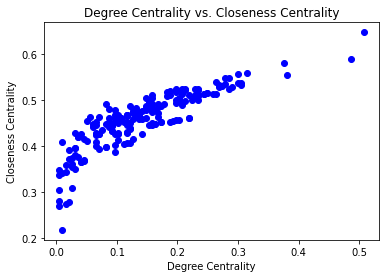

Person Correlation: 0.8587106972182643
Kendall correlation: 0.735952618073043
Spearman correlation: 0.8899758183086891



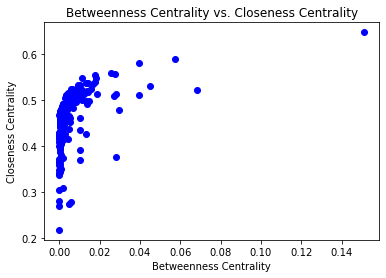

Person Correlation: 0.474533318147102
Kendall correlation: 0.565570608829298
Spearman correlation: 0.7296349465164755



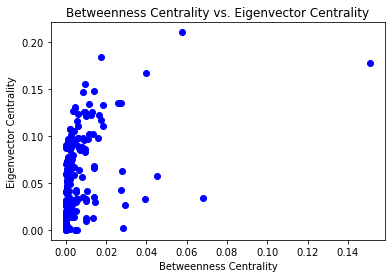

Person Correlation: 0.3973982091413412
Kendall correlation: 0.4165417503990736
Spearman correlation: 0.5668170831713112



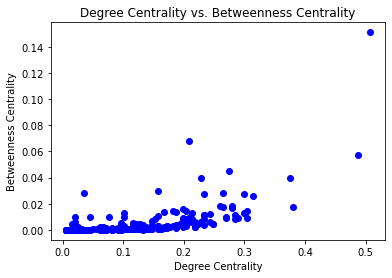

Person Correlation: 0.6051349791324673
Kendall correlation: 0.5787072584461878
Spearman correlation: 0.7425814037045885



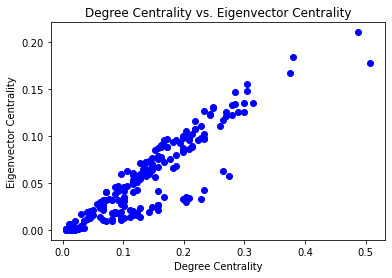

Person Correlation: 0.9009969374426157
Kendall correlation: 0.7502856369607785
Spearman correlation: 0.8898117929232551



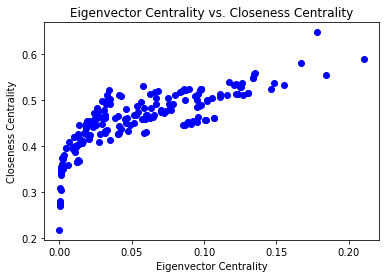

Person Correlation: 0.7836833939294423
Kendall correlation: 0.6816900712021191
Spearman correlation: 0.8396874476211065

Plots for graph_polblog.gml


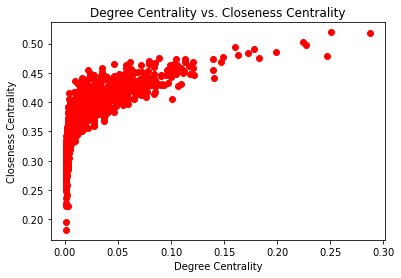

Person Correlation: 0.7231572938687221
Kendall correlation: 0.7667639730160004
Spearman correlation: 0.9235824237834013



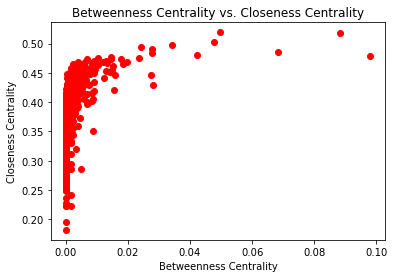

Person Correlation: 0.39145107829724873
Kendall correlation: 0.6909056080911741
Spearman correlation: 0.8595291353276447



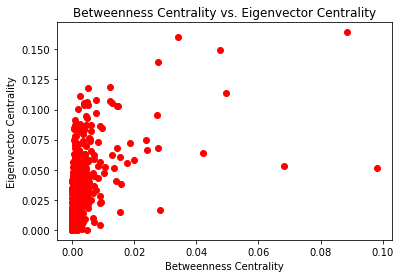

Person Correlation: 0.5053636953323739
Kendall correlation: 0.6565591310732064
Spearman correlation: 0.8359068917351269



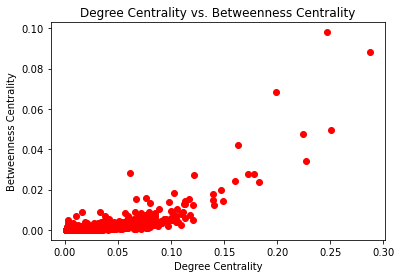

Person Correlation: 0.750649042303374
Kendall correlation: 0.7650728276270042
Spearman correlation: 0.9074662557288967



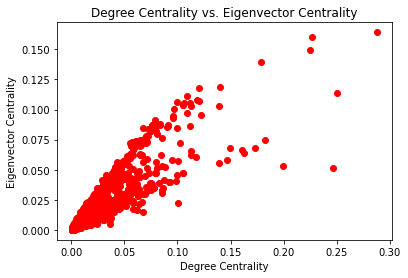

Person Correlation: 0.8839868880099128
Kendall correlation: 0.8141941352508475
Spearman correlation: 0.9518430233171467



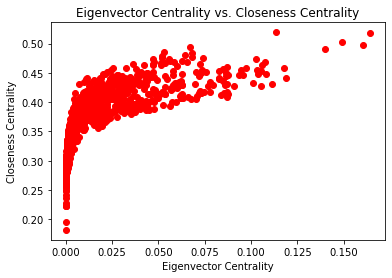

Person Correlation: 0.7027942099795033
Kendall correlation: 0.7552717069180305
Spearman correlation: 0.9199400509762885

Plots for graph_terrorists.gml


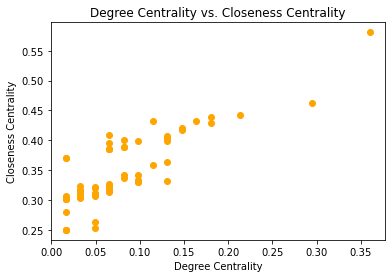

Person Correlation: 0.8373140120704975
Kendall correlation: 0.7013857454691395
Spearman correlation: 0.830732183391181



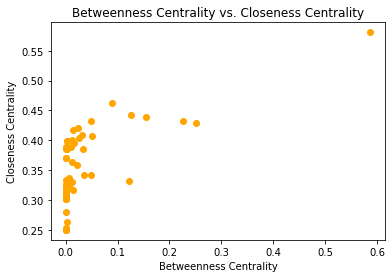

Person Correlation: 0.6800958252171332
Kendall correlation: 0.5907758316227861
Spearman correlation: 0.7463655135604728



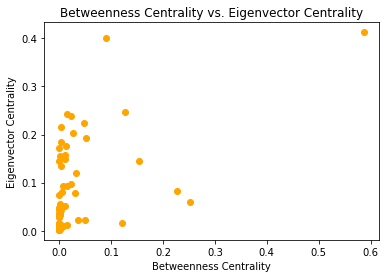

Person Correlation: 0.4937392972802439
Kendall correlation: 0.4104369474731793
Spearman correlation: 0.5556260266180424



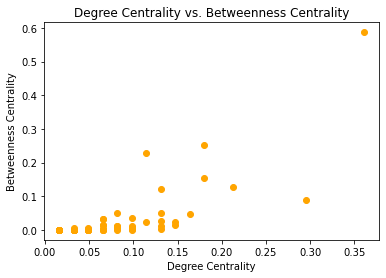

Person Correlation: 0.7507736170850198
Kendall correlation: 0.6965515610208622
Spearman correlation: 0.8385154596500505



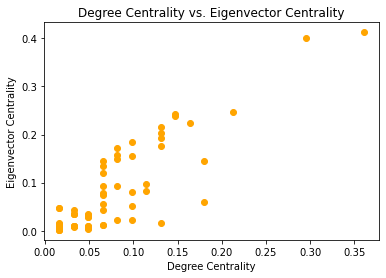

Person Correlation: 0.8569050642191778
Kendall correlation: 0.630057095271975
Spearman correlation: 0.7909065405054472



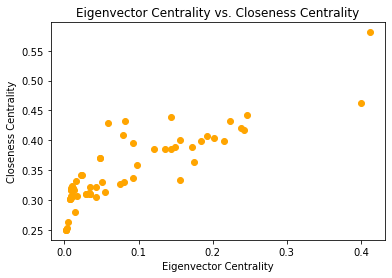

Person Correlation: 0.8585535503034172
Kendall correlation: 0.7210620510878796
Spearman correlation: 0.8802954460285214



In [68]:
for i in range(len(filenames)):
    col = set_color(i)
        
    filename = filenames[i][5:]
    g = nx.read_gml("data/{}".format(filename))
    degree_cen = nx.degree_centrality(g)
    close_cen = nx.closeness_centrality(g)
    between_cen = nx.betweenness_centrality(g)
    eigen_cen = nx.eigenvector_centrality(g)
    
    print("Plots for {}".format(filename))
    
    cen_1_title = "Degree Centrality"
    cen_2_title = "Closeness Centrality"
    pearson_1 = sp.pearsonr(convert_2_arr(degree_cen), convert_2_arr(close_cen))
    kendall_1 = sp.kendalltau(convert_2_arr(degree_cen), convert_2_arr(close_cen))
    spearman_1 = sp.spearmanr(convert_2_arr(degree_cen), convert_2_arr(close_cen))
    scatterplot_centralities(degree_cen, close_cen, cen_1_title, cen_2_title, col)
    print_correlation(pearson_1, kendall_1, spearman_1)
    
    
    
    cen_1_title = "Betweenness Centrality"
    cen_2_title = "Closeness Centrality"
    pearson_2 = sp.pearsonr(convert_2_arr(between_cen), convert_2_arr(close_cen))
    kendall_2 = sp.kendalltau(convert_2_arr(between_cen), convert_2_arr(close_cen))
    spearman_2 = sp.spearmanr(convert_2_arr(between_cen), convert_2_arr(close_cen))
    scatterplot_centralities(between_cen, close_cen, cen_1_title, cen_2_title, col)
    print_correlation(pearson_2, kendall_2, spearman_2)
    
    cen_1_title = "Betweenness Centrality"
    cen_2_title = "Eigenvector Centrality"
    pearson_3 = sp.pearsonr(convert_2_arr(between_cen), convert_2_arr(eigen_cen))
    kendall_3 = sp.kendalltau(convert_2_arr(between_cen), convert_2_arr(eigen_cen))
    spearman_3 = sp.spearmanr(convert_2_arr(between_cen), convert_2_arr(eigen_cen))
    scatterplot_centralities(between_cen, eigen_cen, cen_1_title, cen_2_title, col)
    print_correlation(pearson_3, kendall_3, spearman_3)
    
    
    
    cen_1_title =  "Degree Centrality"
    cen_2_title = "Betweenness Centrality"
    pearson_4 = sp.pearsonr(convert_2_arr(degree_cen), convert_2_arr(between_cen))
    kendall_4 = sp.kendalltau(convert_2_arr(degree_cen), convert_2_arr(between_cen))
    spearman_4 = sp.spearmanr(convert_2_arr(degree_cen), convert_2_arr(between_cen))
    scatterplot_centralities(degree_cen, between_cen, cen_1_title, cen_2_title, col)
    print_correlation(pearson_4, kendall_4, spearman_4)
    
    
    cen_1_title =  "Degree Centrality"
    cen_2_title = "Eigenvector Centrality"
    pearson_5 = sp.pearsonr(convert_2_arr(degree_cen), convert_2_arr(eigen_cen))
    kendall_5 = sp.kendalltau(convert_2_arr(degree_cen), convert_2_arr(eigen_cen))
    spearman_5 = sp.spearmanr(convert_2_arr(degree_cen), convert_2_arr(eigen_cen))
    scatterplot_centralities(degree_cen, eigen_cen, cen_1_title, cen_2_title, col)
    print_correlation(pearson_5, kendall_5, spearman_5)
    
    
    cen_1_title =  "Eigenvector Centrality"
    cen_2_title = "Closeness Centrality"
    pearson_6 = sp.pearsonr(convert_2_arr(eigen_cen), convert_2_arr(close_cen))
    kendall_6 = sp.kendalltau(convert_2_arr(eigen_cen), convert_2_arr(close_cen))
    spearman_6 = sp.spearmanr(convert_2_arr(eigen_cen), convert_2_arr(close_cen))
    scatterplot_centralities(eigen_cen, close_cen, cen_1_title, cen_2_title, col)
    print_correlation(pearson_6, kendall_6, spearman_6)
    
    



<ul>
    <li><b>Degree Centrality</b>: how much jazz musicians are connected to others musicians</li>

<li><b>Closeness Centrality</b>: importance of musicians, based on how fast the information from one musician to the other can be spreaded</li>

<li><b>Betwenness Centrality</b>: Musician's importance is given by how much they can route / channel information flow within the community</li>
</ul>

<h1>A03.2 Centrality and randomisation</h1>

In [71]:
def scatter_before_vs_after_rnd(c, crand, name_1, name_2, col):
    plt.title("{} vs. {}".format(name_1, name_2))
    plt.scatter(c, crand, color=col)
    plt.xscale('linear')
    plt.yscale('linear')
    plt.xlabel("{}".format(name_1))
    plt.ylabel("{}".format(name_2))
    plt.show()
    

Scatterplot for: graph_jazz_collab.gml


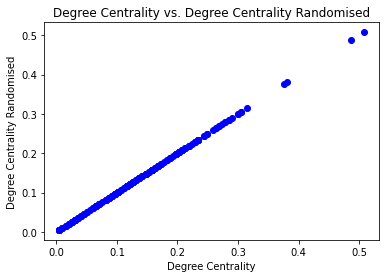

Person Correlation: 1.0
Kendall correlation: 1.0
Spearman correlation: 1.0



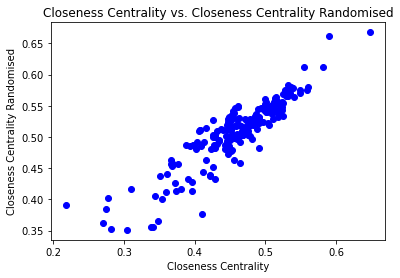

Person Correlation: 0.9048360864976503
Kendall correlation: 0.7272121200885491
Spearman correlation: 0.8873575305646063



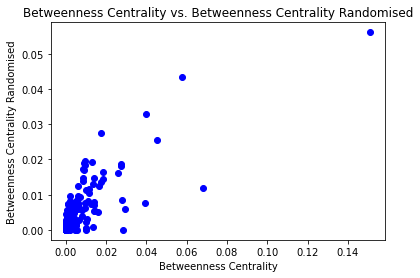

Person Correlation: 0.7841735896289426
Kendall correlation: 0.5671459818109371
Spearman correlation: 0.7328131171104785



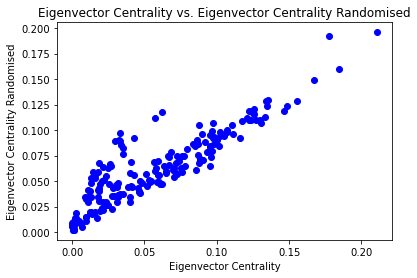

Person Correlation: 0.9007792845428788
Kendall correlation: 0.7339675494523964
Spearman correlation: 0.8860918199098592

Scatterplot for: graph_polblog.gml


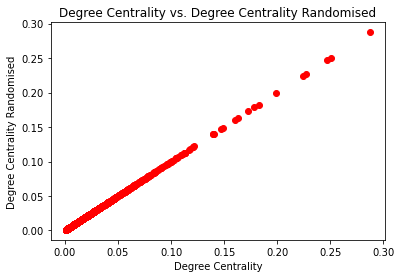

Person Correlation: 1.0
Kendall correlation: 1.0
Spearman correlation: 1.0



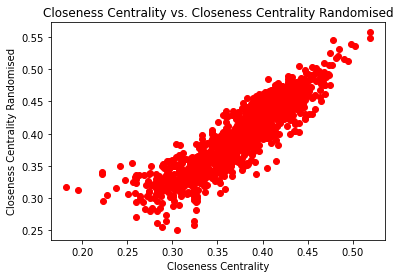

Person Correlation: 0.8936391857384098
Kendall correlation: 0.7356058855549346
Spearman correlation: 0.9111326492046807



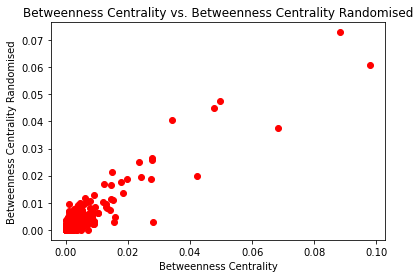

Person Correlation: 0.9268001798835042
Kendall correlation: 0.7230044516659005
Spearman correlation: 0.8816444123106324



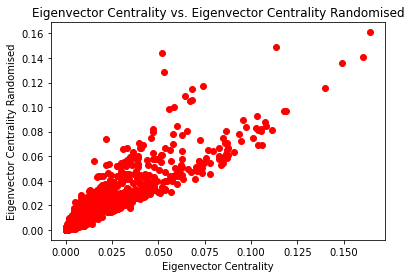

Person Correlation: 0.9015349491738931
Kendall correlation: 0.7867382604913027
Spearman correlation: 0.9441552213069343

Scatterplot for: graph_terrorists.gml


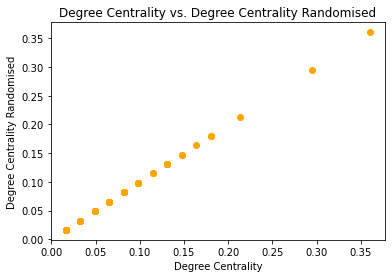

Person Correlation: 0.9999999999999998
Kendall correlation: 1.0
Spearman correlation: 1.0



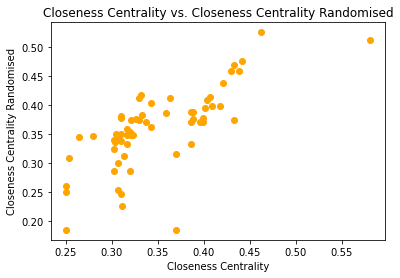

Person Correlation: 0.7236662421136864
Kendall correlation: 0.6049404503063285
Spearman correlation: 0.7670174774071377



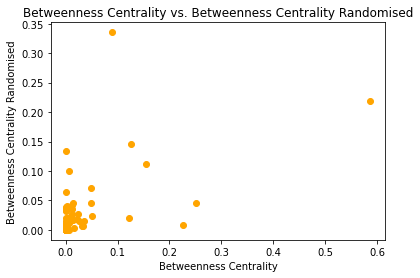

Person Correlation: 0.5314827072751643
Kendall correlation: 0.4462017754143206
Spearman correlation: 0.5881539090694468



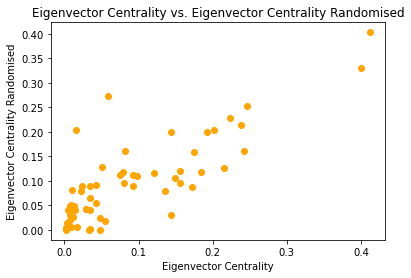

Person Correlation: 0.8142185039575605
Kendall correlation: 0.5759761829516137
Spearman correlation: 0.7548640654726114



In [72]:
for i in range(len(filenames)):
    col = set_color(i)
    
    filename = filenames[i][5:]
    g = nx.read_gml("data/{}".format(filename))
    grand = nx.algorithms.smallworld.random_reference(g, niter = 1, connectivity=False)
    
    degree_cen = nx.degree_centrality(g)
    close_cen = nx.closeness_centrality(g)
    between_cen = nx.betweenness_centrality(g)
    eigen_cen = nx.eigenvector_centrality(g)
    
    degree_cen_rand = nx.degree_centrality(grand)
    close_cen_rand = nx.closeness_centrality(grand)
    between_cen_rand = nx.betweenness_centrality(grand)
    eigen_cen_rand = nx.eigenvector_centrality(grand)
    
    print("Scatterplot for: {}".format(filename))
    
    cen_1_title = "Degree Centrality"
    cen_2_title = "Degree Centrality Randomised"
    pearson_1 = sp.pearsonr(convert_2_arr(degree_cen), convert_2_arr(degree_cen_rand))
    kendall_1 = sp.kendalltau(convert_2_arr(degree_cen), convert_2_arr(degree_cen_rand))
    spearman_1 = sp.spearmanr(convert_2_arr(degree_cen), convert_2_arr(degree_cen_rand))
    scatter_before_vs_after_rnd(degree_cen.values(), degree_cen_rand.values(), cen_1_title, cen_2_title, col)
    print_correlation(pearson_1, kendall_1, spearman_1)
    
    
    cen_1_title = "Closeness Centrality"
    cen_2_title = "Closeness Centrality Randomised"
    pearson_2 = sp.pearsonr(convert_2_arr(close_cen), convert_2_arr(close_cen_rand))
    kendall_2 = sp.kendalltau(convert_2_arr(close_cen), convert_2_arr(close_cen_rand))
    spearman_2 = sp.spearmanr(convert_2_arr(close_cen), convert_2_arr(close_cen_rand))
    scatter_before_vs_after_rnd(close_cen.values(), close_cen_rand.values(), cen_1_title, cen_2_title, col)
    print_correlation(pearson_2, kendall_2, spearman_2)
    
    
    cen_1_title = "Betweenness Centrality"
    cen_2_title = "Betweenness Centrality Randomised"
    pearson_3 = sp.pearsonr(convert_2_arr(between_cen), convert_2_arr(between_cen_rand))
    kendall_3 = sp.kendalltau(convert_2_arr(between_cen), convert_2_arr(between_cen_rand))
    spearman_3 = sp.spearmanr(convert_2_arr(between_cen), convert_2_arr(between_cen_rand))
    scatter_before_vs_after_rnd(between_cen.values(), between_cen_rand.values(), cen_1_title, cen_2_title, col)
    print_correlation(pearson_3, kendall_3, spearman_3)
    
    
    cen_1_title = "Eigenvector Centrality"
    cen_2_title = "Eigenvector Centrality Randomised"
    pearson_4 = sp.pearsonr(convert_2_arr(eigen_cen), convert_2_arr(eigen_cen_rand))
    kendall_4 = sp.kendalltau(convert_2_arr(eigen_cen), convert_2_arr(eigen_cen_rand))
    spearman_4 = sp.spearmanr(convert_2_arr(eigen_cen), convert_2_arr(eigen_cen_rand))
    scatter_before_vs_after_rnd(eigen_cen.values(), eigen_cen_rand.values(), cen_1_title, cen_2_title, col)
    print_correlation(pearson_4, kendall_4, spearman_4)
    
    
    
    
    
    
    

Degree centrality does not change with the randomisation because the number of links between nodes in a network remains the same

<h1>A03.3 Page Rank</h1>

In [73]:
def scatter_aplha_vs_spearman(x, y):
    plt.scatter(x, y)
    plt.title("Alphas vs. Spearman’s correlation ")
    plt.xlabel("a")
    plt.ylabel("p(a)")
    plt.show()

In [74]:
g = nx.read_graphml('data/Florida_foodweb.graphml')

In [75]:
alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 0.99]

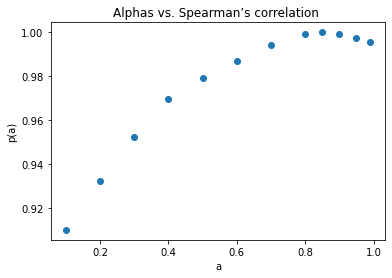

In [76]:
correlations = []
for alpha in alphas:
    pr = nx.pagerank(g, alpha=alpha)
    
    spearman = sp.stats.spearmanr(convert_2_arr(nx.pagerank(g, alpha=0.85)), convert_2_arr(pr))                            
    correlations.append(spearman[0])    
                                              
scatter_aplha_vs_spearman(alphas, correlations)
    